In [1]:
import qiskit
from qiskit import assemble, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit.compiler import transpile
from random import *
from qiskit import Aer
sim = Aer.get_backend("statevector_simulator")
import numpy as np
from qiskit.circuit.library.standard_gates import HGate
from qiskit.circuit.library import RZGate, RYGate

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import time
from IPython.display import clear_output

In [2]:
df = pd.read_excel('FM Monte Carlo 4x4p iterations long1.xlsx')
df

,Unnamed: 0,temp=0.01,temp=0.9188636363636364,temp=1.8277272727272729,temp=2.736590909090909,temp=3.6454545454545455,temp=4.554318181818182,temp=5.463181818181818,temp=6.372045454545455,temp=7.280909090909091,temp=8.189772727272727,temp=9.098636363636365,temp=10.0075,temp=10.916363636363636,temp=11.825227272727274,temp=12.73409090909091
0,0,1,1,1.0,0.875,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.875,1.000,1.000
1,1,1,1,1.0,0.875,1.000,1.000,0.875,1.000,1.000,1.000,1.000,0.875,0.750,1.000,1.000
2,2,1,1,1.0,0.875,1.000,1.000,0.750,0.875,1.000,1.000,0.875,0.750,0.625,0.875,0.875
3,3,1,1,1.0,0.875,1.000,0.875,0.750,1.000,0.875,0.875,0.750,0.625,0.625,0.875,0.875
4,4,1,1,1.0,0.875,1.000,0.875,0.875,1.000,0.875,0.875,0.625,0.750,0.625,0.750,0.750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,1,1,1.0,0.875,0.125,0.000,0.875,0.375,0.375,0.375,0.125,0.500,0.375,0.125,0.250
9996,9996,1,1,1.0,0.750,0.125,0.000,0.875,0.375,0.500,0.500,0.000,0.375,0.375,0.250,0.125
9997,9997,1,1,1.0,0.750,0.000,0.000,0.875,0.500,0.375,0.375,0.125,0.250,0.250,0.250,0.000
9998,9998,1,1,1.0,0.750,0.125,0.125,0.875,0.375,0.375,0.500,0.250,0.375,0.250,0.125,0.125


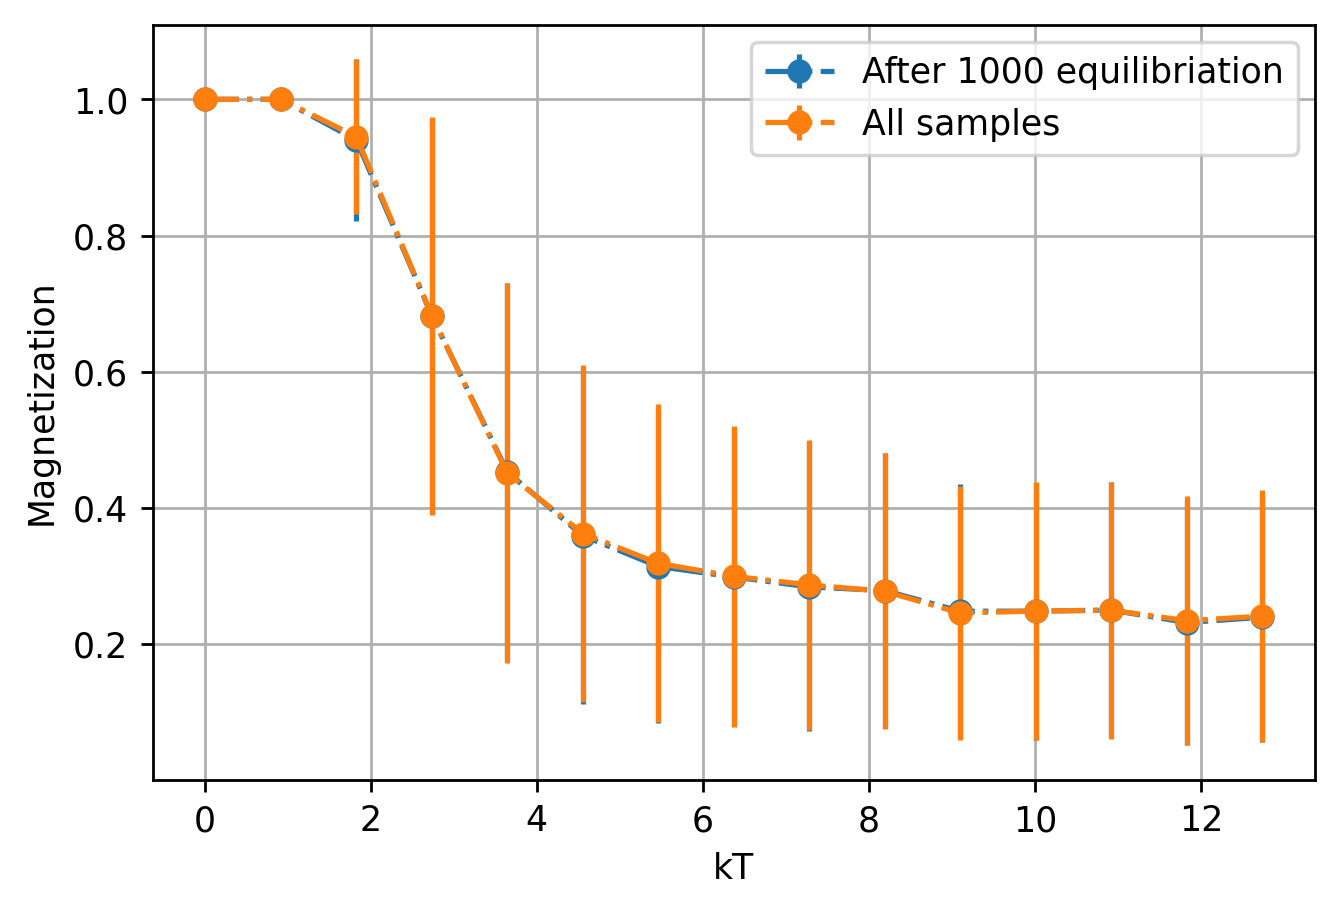

In [3]:
eqlb = 1000
keys = df.keys()[1:]
temps = np.linspace(0.01, 40, 45)
temps = temps[:15]
mag = []
std = []
mag1 = []
std1 = []
for key in keys:
    mag.append(np.mean(df[key][eqlb:]))
    std.append(np.std(df[key][eqlb:]))
    mag1.append(np.mean(df[key]))
    std1.append(np.std(df[key]))
    
plt.figure(dpi = 250)
plt.errorbar(temps, mag, std, linestyle='-.', marker='o', label = 'After {}'.format(eqlb) + ' equilibriation')
plt.errorbar(temps, mag1, std1, linestyle='-.', marker='o', label = 'All samples')
plt.legend()
plt.xlabel('kT')
plt.ylabel('Magnetization')
plt.grid()

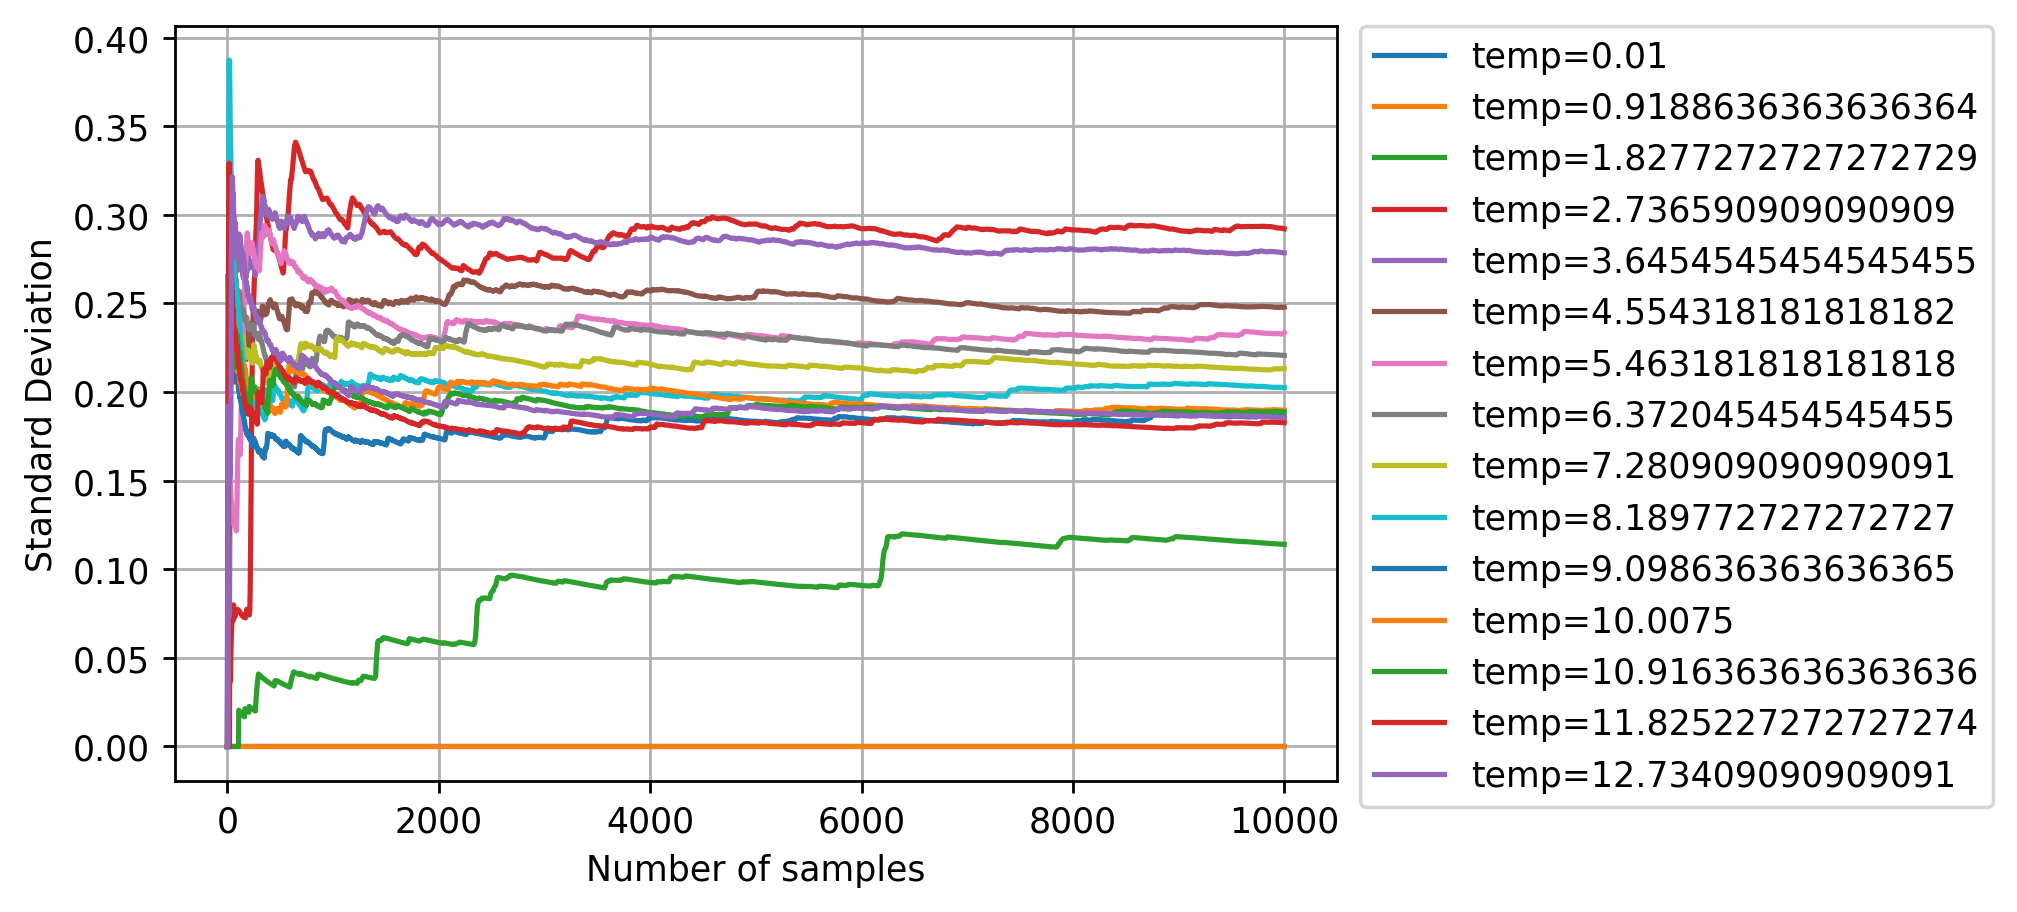

In [4]:
plt.figure(dpi = 250)

for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[:i]) for i in range(len(temp_data))]
    plt.plot(std, label = key)
    
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Standard Deviation')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.show()

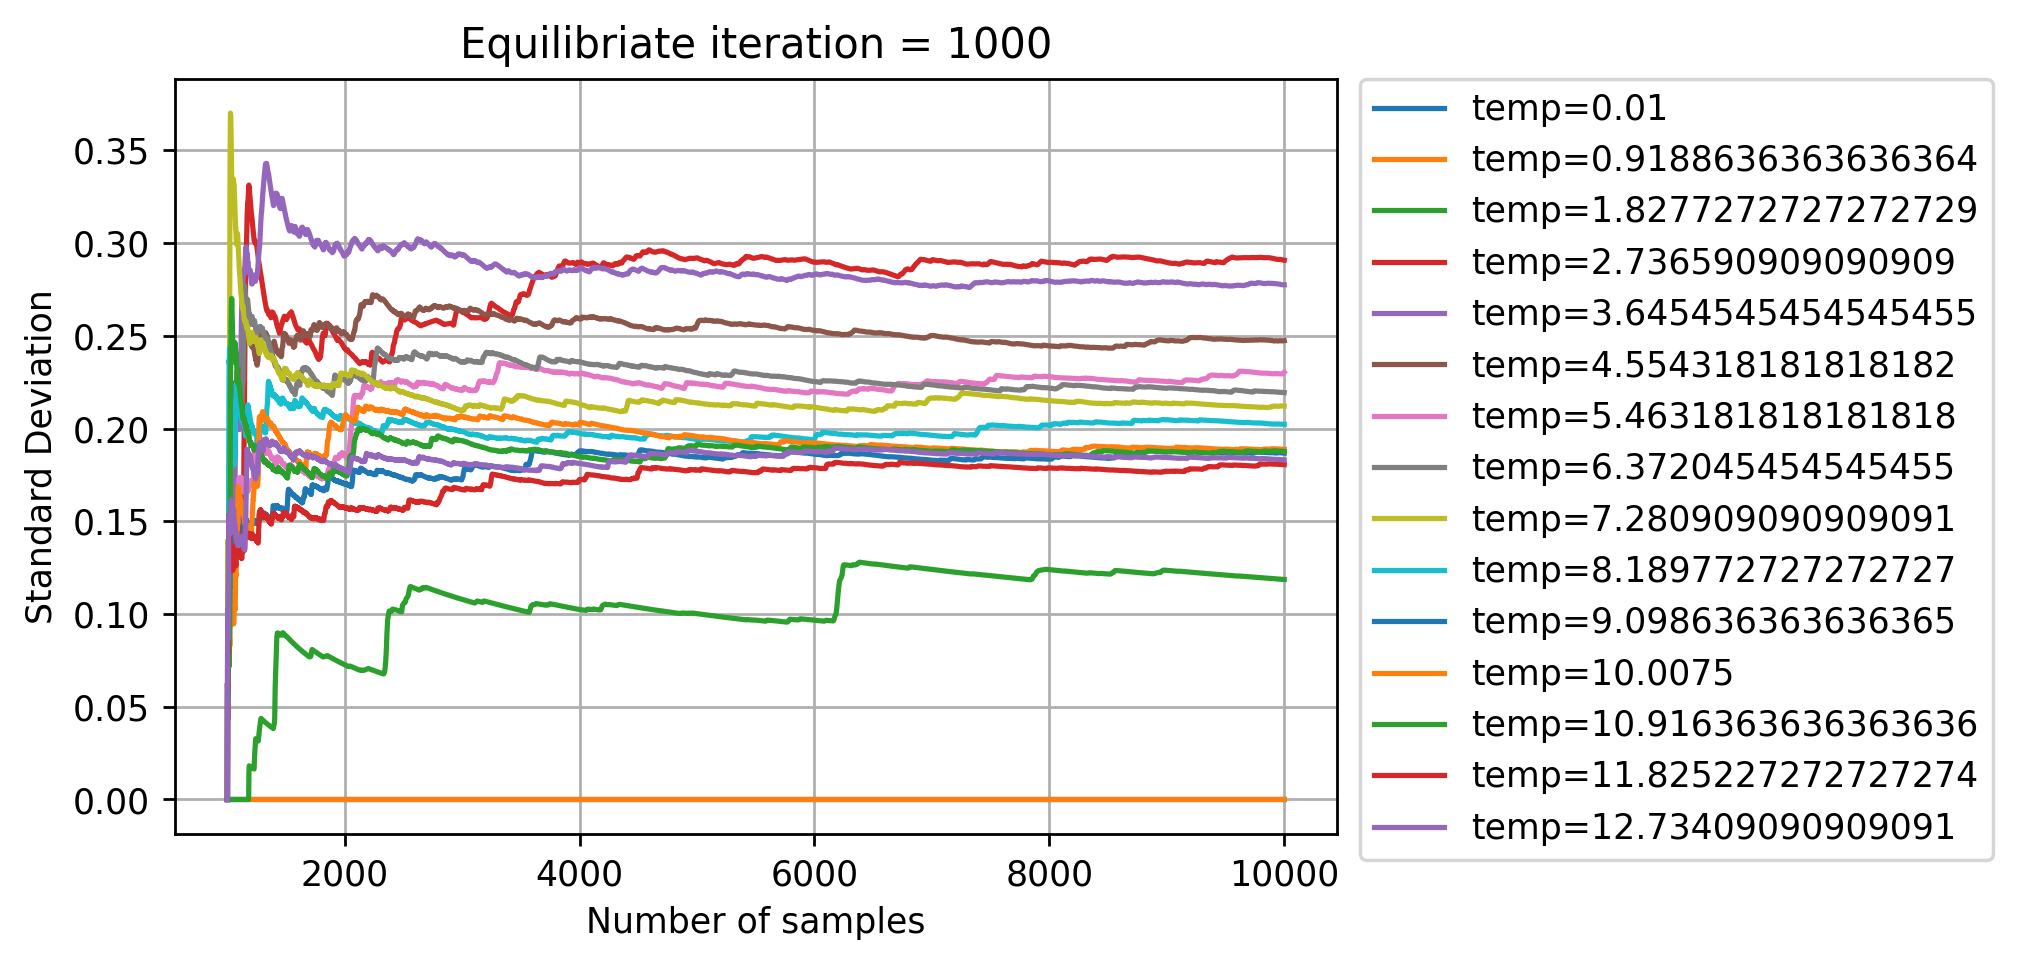

In [7]:
plt.figure(dpi = 250)
samples = np.linspace(eqlb+1, 10000, 10000-eqlb).astype('int64')
for key in keys:
    temp_data = df[key]
    std = [np.std(temp_data[eqlb:i]) for i in samples]
    plt.plot(samples, std, label = key)
    
plt.legend()
plt.xlabel('Number of samples')
plt.ylabel('Standard Deviation')
plt.title('Equilibriate iteration = {}'.format(eqlb))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.grid()
plt.show()